In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from wordcloud import *
from collections import defaultdict
from scipy.misc import imread
import re

In [29]:
propFile=open('edit.prop')
texts=propFile.read()
texts

'filename=<Data.csv>\ntitle=<档案转寄单位>\nignoreword=<社会,保障局,和,）,（,分行,分配,股份,有限责任,就业指导,第一,第二,第三,第四,第五,第六,中国,中心>\nbackground=<love.jpg>\nfontfile=<>'

In [30]:

dicts={}
matchFilename = re.match( r'filename=<(.*)>[.\n]title=<(.*)>[.\n]ignoreword=<(.*)>[.\n]background=<(.*)>[.\n]fontfile=<(.*)>', texts, re.M|re.DOTALL)
if matchFilename:
    dicts={'fn':matchFilename.group(1),'tt':matchFilename.group(2),'ignw':matchFilename.group(3),'bg':matchFilename.group(4)}
else:
    print("No matchFilename!!")
filename=dicts['fn']
filename

'Data.csv'

In [31]:
csv=mateItems=pd.read_csv(dicts['fn'],encoding='utf-8')
csv

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [35]:
csv['Country']

0     France
1      Spain
2    Germany
3      Spain
4    Germany
5     France
6      Spain
7     France
8    Germany
9     France
Name: Country, dtype: object

In [37]:
# mateItems=pd.read_excel(dicts['fn'],encoding='utf-8')
ignw=dicts['ignw']
ignore_word=ignw.split(",")
tt=dicts['tt']
# titleItems=mateItems[tt]
titleItems=csv['Country']
bg=dicts['bg']
titleItems

    



0     France
1      Spain
2    Germany
3      Spain
4    Germany
5     France
6      Spain
7     France
8    Germany
9     France
Name: Country, dtype: object

In [38]:
#读入背景图片
back_coloring = imread(bg)
wc1d = WordCloud(font_path="fonts/STFANGSO.TTF",background_color="white", #背景颜色  
                max_words=100,# 词云显示的最大词数  
                mask=back_coloring,#设置背景图片  
                max_font_size=100, random_state=42,width=500, height=300, margin=2
)

/home/jiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [39]:
## 结巴分词
dat_fc = []

data_test = list(titleItems)

for i in data_test:
    ct_w=jieba.cut(i)
    ct_l=list(ct_w)

    dat_fc.append(ct_l)

In [40]:

frequentWord =defaultdict(int)
for i in dat_fc:
    for j in i:
        if(j not in ignore_word):
            frequentWord[j] += i.count(j)
keys=list(frequentWord.keys())
for k in keys:  
    if frequentWord[k]<3:
        frequentWord.pop(k)

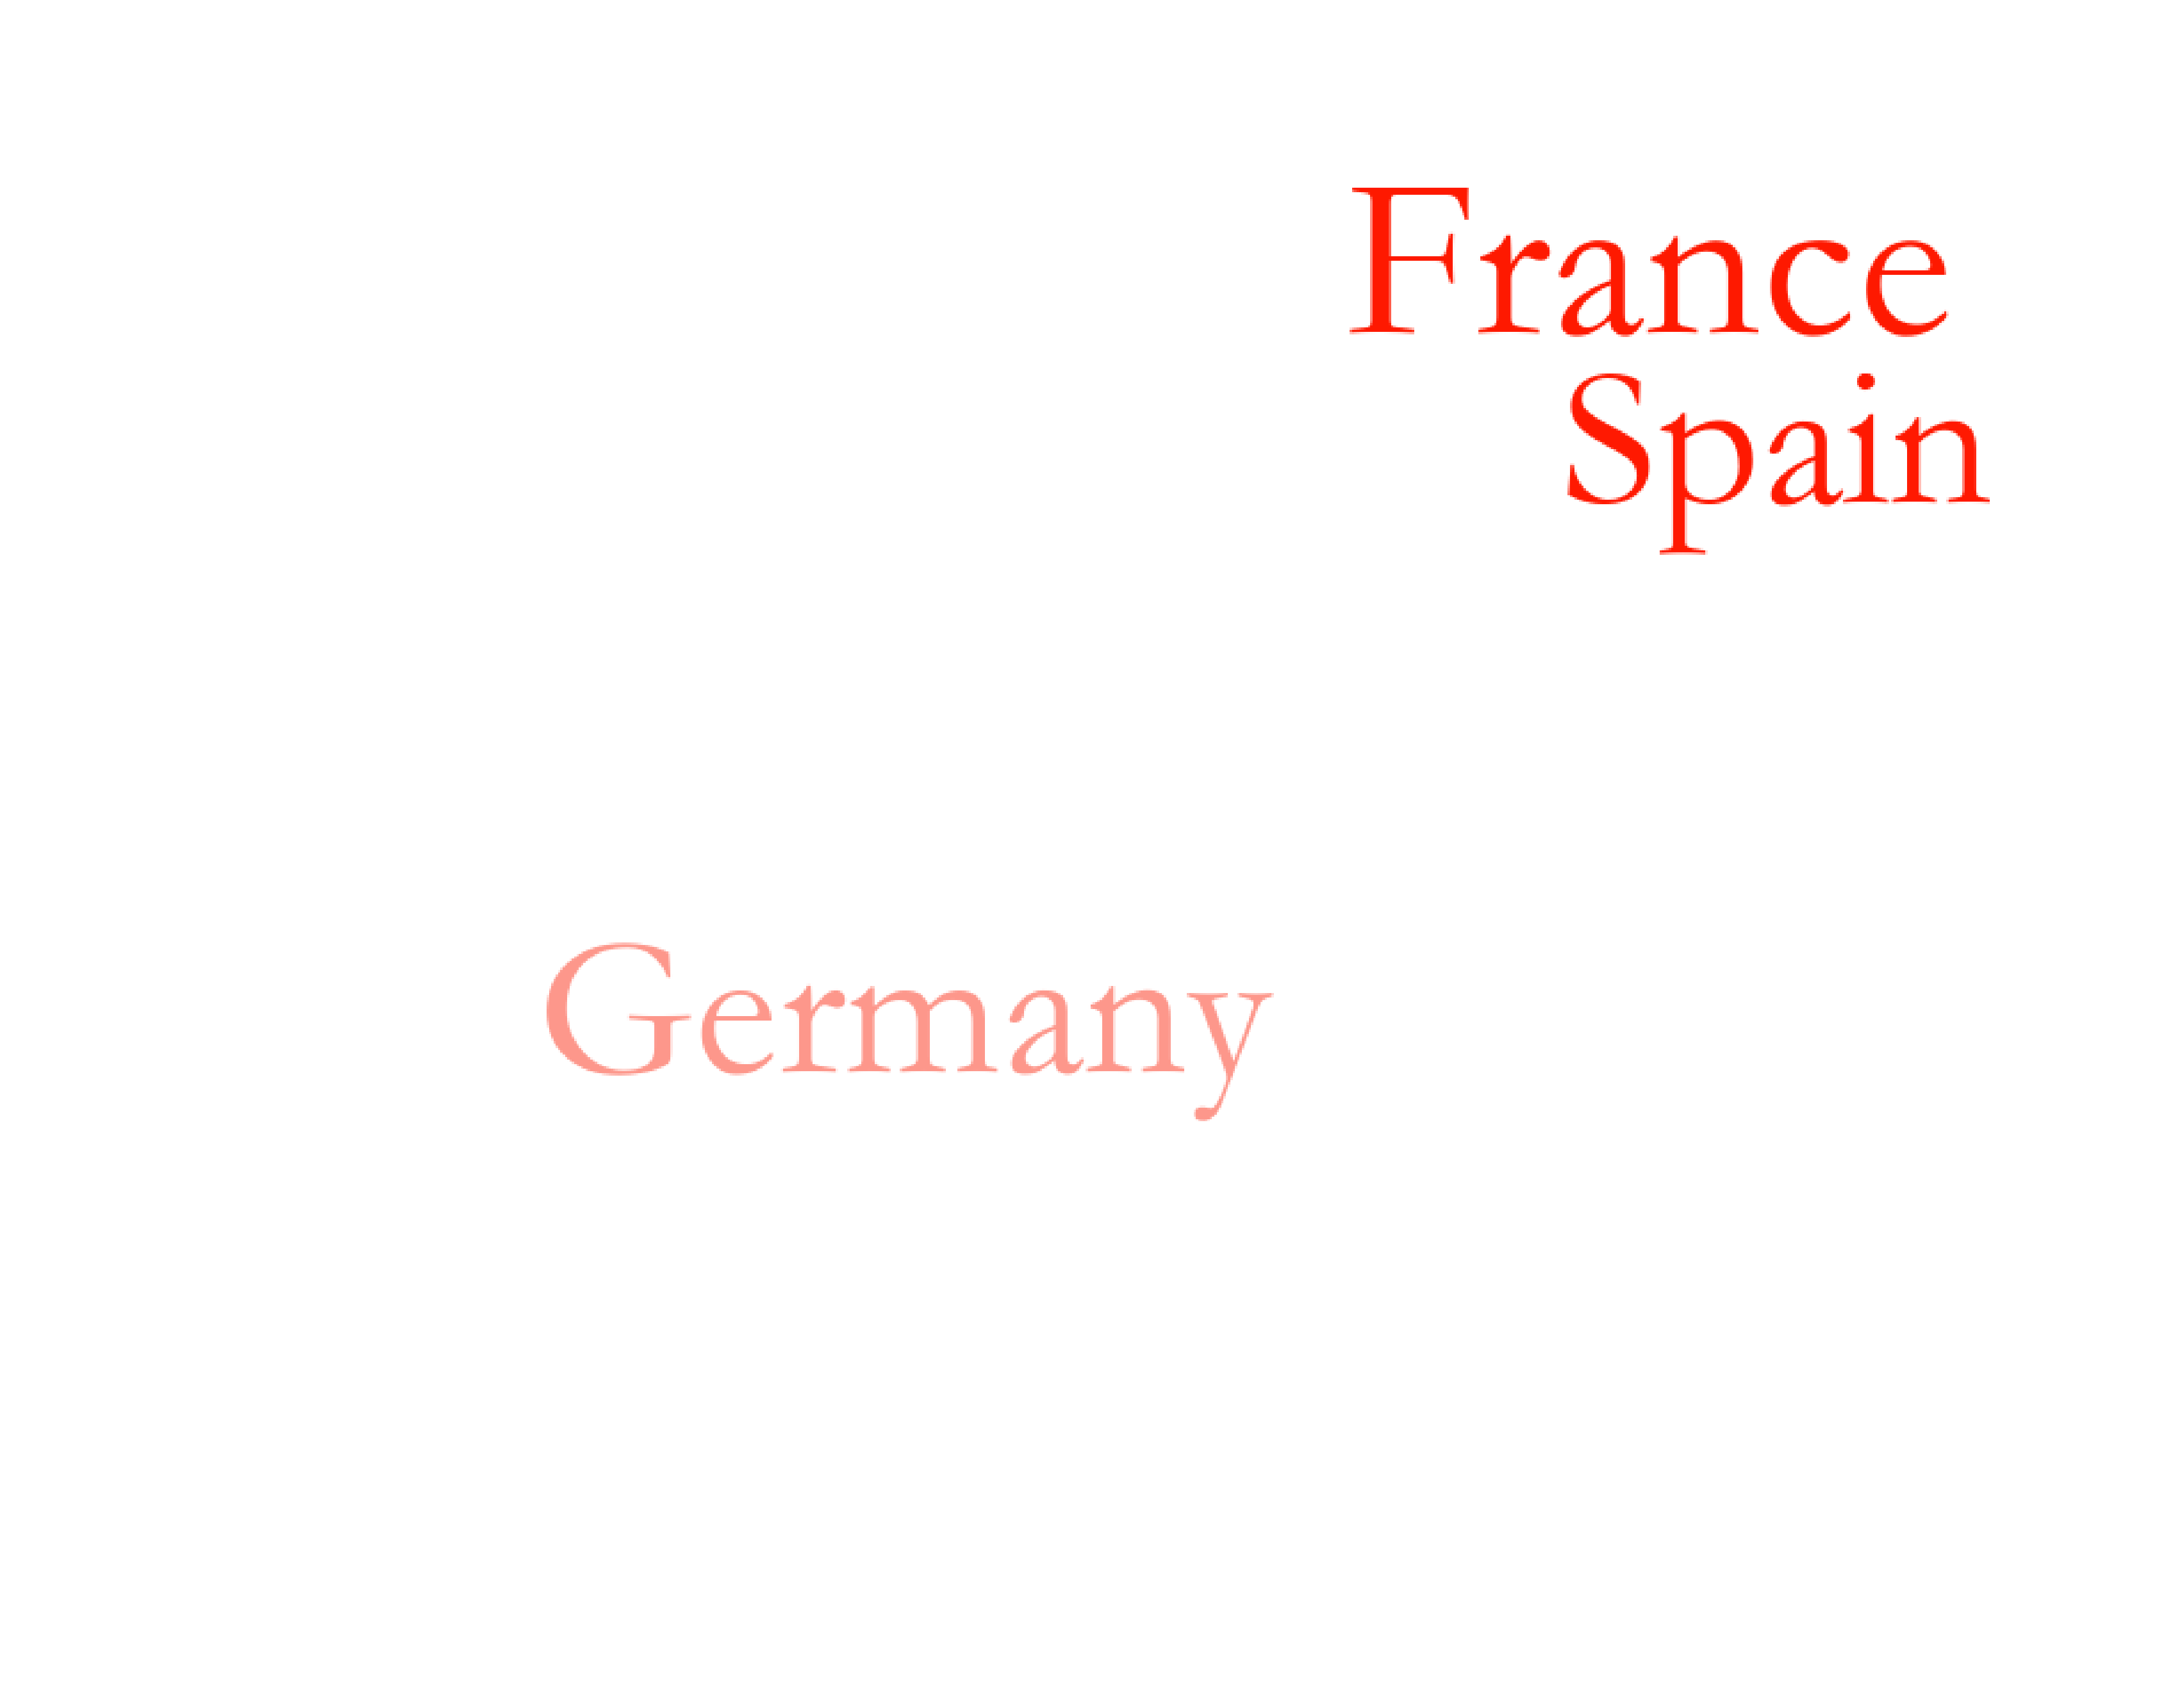

In [41]:


# //根据词频生成词云
my_wordcloud =wc1d.generate_from_frequencies(frequentWord)
#背景图片
image_colors = ImageColorGenerator(back_coloring)
#图片尺寸
plt.figure(figsize=(60,60)) 
plt.axis("off")
plt.imshow(my_wordcloud.recolor(color_func=image_colors))
plt.show()
